In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('/content/fraud_detection-datasets.csv')

In [117]:
# Columns Avalilable in dataset
df.columns
df.info()
# Sample the 'Payment_Method' column
print("\nPayment Method sample:")
print(df['Payment_Method'].sample())
print("\nPayment Method sample (first 5 samples):")
print(df['Payment_Method'].head())
print("\nPayment Method sample (last 5 samples):")
print(df['Payment_Method'].tail())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


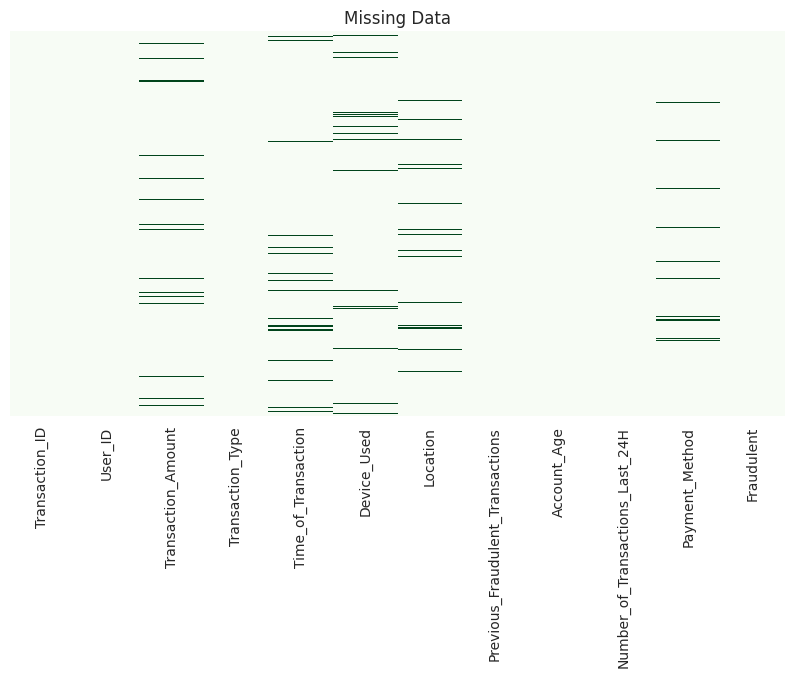

In [118]:
#Missing Data Heatmap: Identify missing data patterns.
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="Greens", cbar=False, yticklabels=False)
plt.title("Missing Data")
plt.show()

In [119]:
#Checking the missing values
print(df.isnull().sum())

#Handling the missing values
print("\nBefore Handling the missing values from the dataset:\n",df.isnull().sum())
df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean(), inplace=True)
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].mode()[0], inplace=True)
df['Device_Used'].fillna(df['Device_Used'].mode()[0], inplace=True)
print("\nAfter Handling the missing values from the dataset:\n",df.isnull().sum())

#Checking the Statistics
print("\nStatistics of the dataset:\n",df.describe())

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

Before Handling the missing values from the dataset:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                

In [120]:
# Identifying the unique values in key categorical columns
print("\nUnique Transaction Types:", df['Transaction_Type'].nunique())
print("\nUnique Previous Fraud activity done:", df['Previous_Fraudulent_Transactions'].nunique())
print("\nUnique Locations:", df['Location'].nunique())
print("\nUnique Locations:", df['Location'].unique()[:25])
print("\nNumber of transactions last 24Hr:")
print(df['Number_of_Transactions_Last_24H'].unique()[:10])

# Further investigate the key columns by value counts
print("\nPrevious fraud transactions value counts:")
print(df['Previous_Fraudulent_Transactions'].value_counts().head(15))


print("\nAge value counts:")
print(df['Account_Age'].value_counts().head(15))

print("\nNumber of Transaction_Amount value counts:")
print(df['Transaction_Amount'].value_counts().head(15))


Unique Transaction Types: 5

Unique Previous Fraud activity done: 5

Unique Locations: 8

Unique Locations: ['San Francisco' 'New York' 'Boston' 'Chicago' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']

Number of transactions last 24Hr:
[13  3  9  4  7 14 10 12  6  1]

Previous fraud transactions value counts:
Previous_Fraudulent_Transactions
2    10321
0    10280
4    10205
1    10131
3    10063
Name: count, dtype: int64

Age value counts:
Account_Age
29     479
106    476
68     468
111    466
75     466
100    466
45     464
2      461
85     461
10     460
41     460
69     457
77     457
59     457
40     455
Name: count, dtype: int64

Number of Transaction_Amount value counts:
Transaction_Amount
2996.249784     2520
49997.800000     508
2748.080000        4
2092.210000        4
3562.910000        4
495.140000         4
1747.310000        4
398.680000         3
716.590000         3
1457.750000        3
3850.180000        3
1681.960000        3
2657.570000        3
2055.670000       

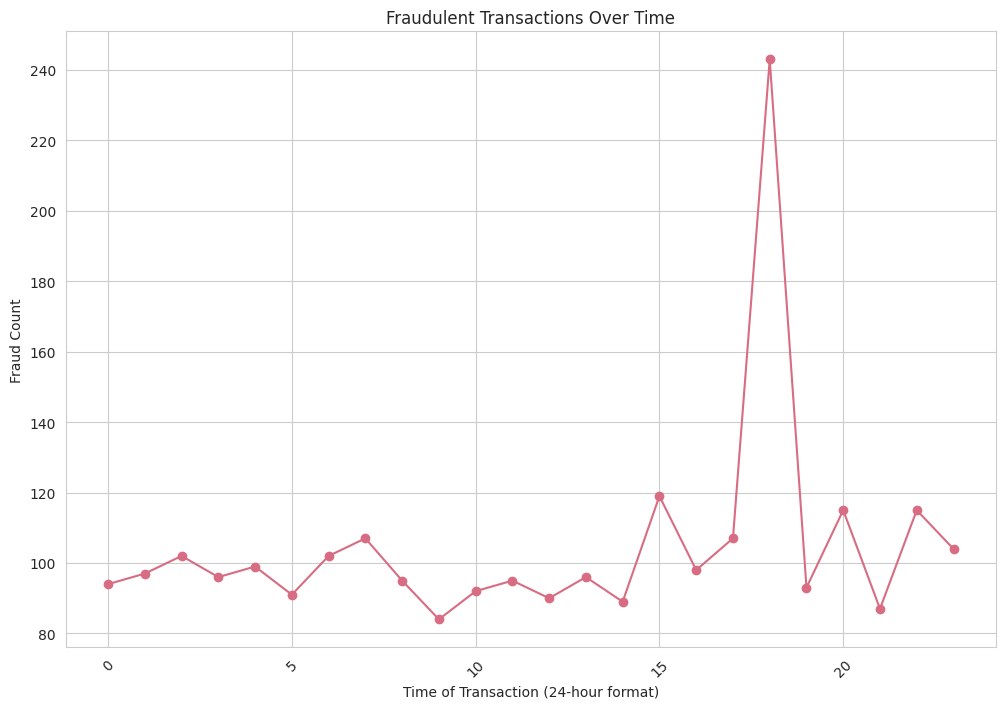

In [121]:
#Analyze fraud cases over time.
# Grouping the dataset by transaction time (e.g., hourly)
fraud_time_data = df.groupby("Time_of_Transaction")["Fraudulent"].sum()

# Plot the line chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fraud_time_data.index, fraud_time_data.values, marker='o', linestyle='-',color='#D76C82')

# Formatting
ax.set_title("Fraudulent Transactions Over Time")
ax.set_xlabel("Time of Transaction (24-hour format)")
ax.set_ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


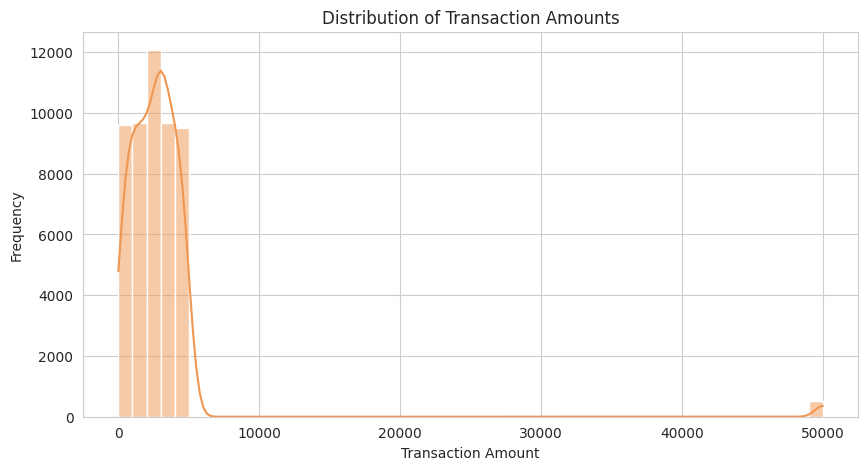

In [122]:
#The distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Transaction_Amount'].dropna(), bins=50, kde=True, color='#EF9651')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

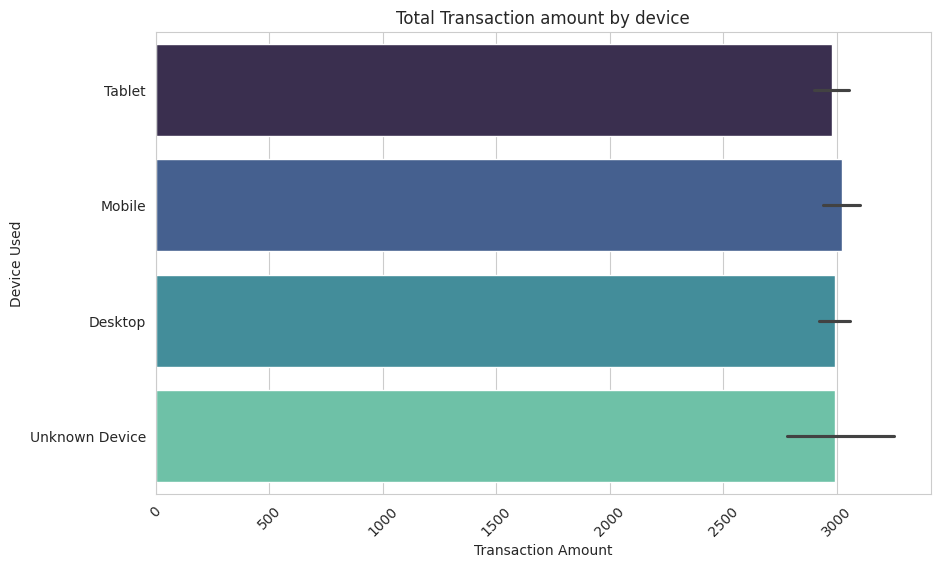

In [123]:
plt.figure(figsize=(10,6))
# Set style
sns.set_style("whitegrid")
sns.barplot(x='Transaction_Amount', y='Device_Used', data=df, palette='mako')
plt.title('Total Transaction amount by device')
plt.xlabel('Transaction Amount')
plt.ylabel('Device Used')
plt.xticks(rotation=45)
plt.show()

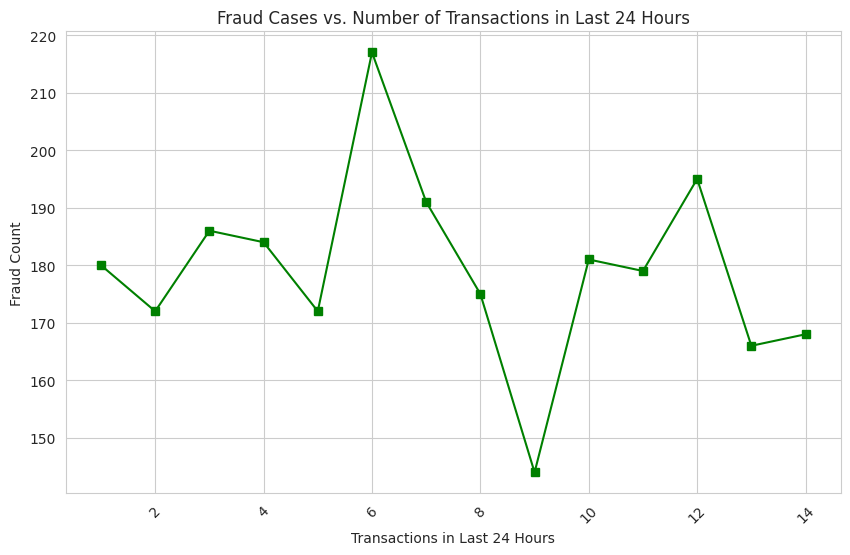

In [124]:
# Group by transaction frequency
transactions_24h_fraud = df.groupby("Number_of_Transactions_Last_24H")["Fraudulent"].sum()

# Line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(transactions_24h_fraud.index, transactions_24h_fraud.values, marker='s', linestyle='-', color='g')
# Formatting
ax.set_title("Fraud Cases vs. Number of Transactions in Last 24 Hours")
ax.set_xlabel("Transactions in Last 24 Hours")
ax.set_ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


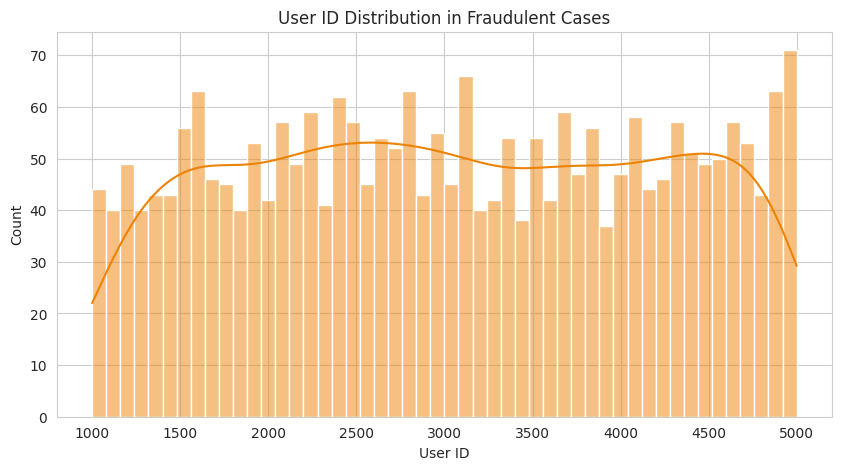

In [125]:
#See if fraud is concentrated among certain users.
plt.figure(figsize=(10, 5))
sns.histplot(df[df["Fraudulent"] == 1]["User_ID"], bins=50, kde=True, color='#EC8305')
plt.title("User ID Distribution in Fraudulent Cases")
plt.xlabel("User ID")
plt.ylabel("Count")
plt.show()


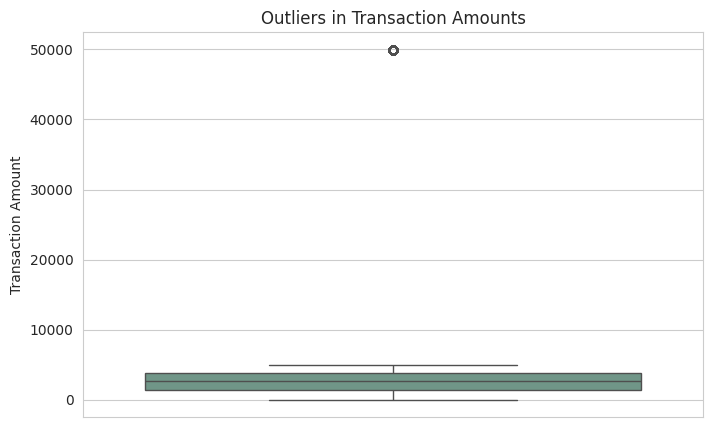

In [126]:
#Outliers in Transaction Amount: Detect extreme transaction values.
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Transaction_Amount"],color='#6A9C89')
plt.title("Outliers in Transaction Amounts")
plt.ylabel("Transaction Amount")
plt.show()

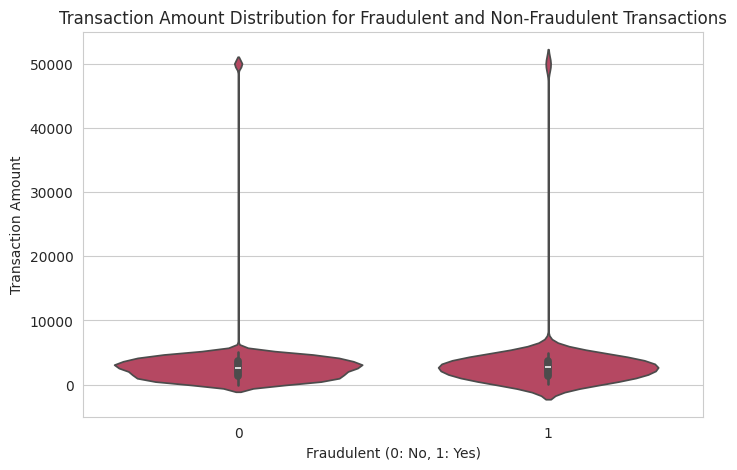

In [127]:
#Transaction Amount Differences in Fraud vs. Non-Fraud Cases: See if fraud cases have higher/lower transaction amounts.
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["Fraudulent"], y=df["Transaction_Amount"],color='#C73659')
plt.title("Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Fraudulent (0: No, 1: Yes)")
plt.ylabel("Transaction Amount")
plt.show()

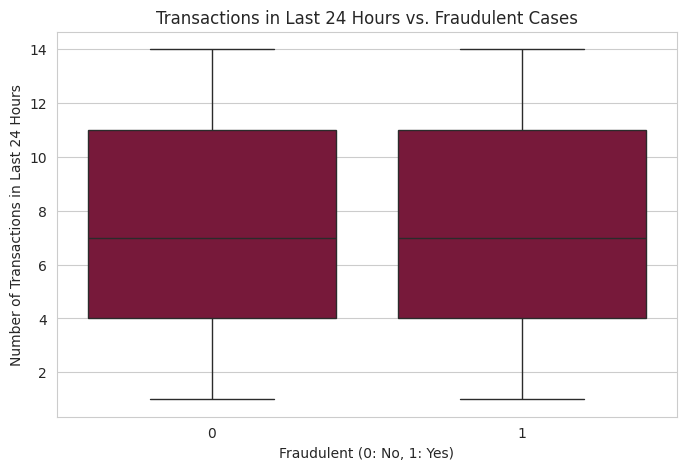

In [128]:
# Impact of Transactions in Last 24 Hours on Fraud: Determine if high transaction frequency increases fraud risk.
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Fraudulent"], y=df["Number_of_Transactions_Last_24H"],color='#860A35')
plt.title("Transactions in Last 24 Hours vs. Fraudulent Cases")
plt.xlabel("Fraudulent (0: No, 1: Yes)")
plt.ylabel("Number of Transactions in Last 24 Hours")
plt.show()

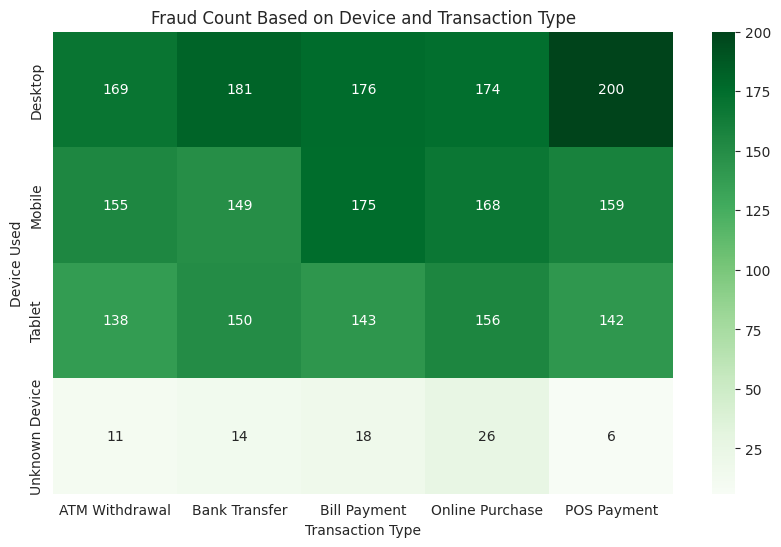

In [129]:
#Device Type & Transaction Type Influence on Fraud: Analyze device and transaction type combinations leading to fraud.
plt.figure(figsize=(10, 6))
device_transaction_fraud = df.groupby(["Device_Used", "Transaction_Type"])["Fraudulent"].sum().unstack()
sns.heatmap(device_transaction_fraud, cmap="Greens", annot=True, fmt=".0f")
plt.title("Fraud Count Based on Device and Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Device Used")
plt.show()